### Import requirements

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

### Load data

In [2]:
# Create a dataframe for the raw data from the json file 
with open('transaction-data-adhoc-analysis.json', 'r') as f:
    data = json.load(f)
    
df = pd.DataFrame(data)

# Part 1: Breakdown of Sales and Quantity

### Create dataframe for part one

In [3]:
df_one =  df.copy()
df_one.head()

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08
3,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/10
4,"33911 Hansen Loaf\nWest Sandra, ND 54188",1949/09/27,michael78@yahoo.com,Kristen Cooper,F,qhernandez,"Candy City,Orange Beans,(x3);Candy City,Gummy ...",2697,2022/01/24


### Separate transaction items

In [4]:
# Create a new column whose row values are lists of the separated transaction items

# Function to split the transaction items from the raw data
def split_items(transaction_items):
    items_list = transaction_items.split(";")
    return items_list

# Apply split_items function to the 'transaction_items' column
df_one['transaction_list'] = df_one.apply(lambda x: split_items(x["transaction_items"]), axis = 1) 
df_one[['transaction_items','transaction_list']].head()

,transaction_items,transaction_list
0,"Exotic Extras,Beef Chicharon,(x4)","[Exotic Extras,Beef Chicharon,(x4)]"
1,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...","[Exotic Extras,Beef Chicharon,(x3), HealthyKid..."
2,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...","[HealthyKid 3+,Gummy Vitamins,(x3), HealthyKid..."
3,"HealthyKid 3+,Yummy Vegetables,(x1)","[HealthyKid 3+,Yummy Vegetables,(x1)]"
4,"Candy City,Orange Beans,(x3);Candy City,Gummy ...","[Candy City,Orange Beans,(x3), Candy City,Gumm..."


### Separate product name and quantity details

In [5]:
# Separate product name (brand and item name) and quantity from each other, then store in new columns

def product_name(transaction_list):
    product_names = []
    for item in transaction_list:
        item_info = item.split(",") # Splits each transaction item into its parts - brand, item name, and quantity
        product_names.append(item_info[0] + " " + item_info[1]) # Appends the product name (brand and item) of each transaction item into the list
    return product_names # Returns the list of product names

def quantity(transaction_list):
    quantities = []
    for item in transaction_list:
        item_info = item.split(",") # Splits each transaction item into its parts - brand, item name, and quantity
        num_filter = filter(str.isdigit, item_info[2]) # Filters the number from the quantity string
        quantities.append(int("".join(num_filter))) # Converts the number into an integer and appends it to list for quantities
    return quantities # Returns the list of quantities


df_one['product_name'] = df_one.apply(lambda x: product_name(x['transaction_list']), axis = 1)     
df_one['quantity'] = df_one.apply(lambda x: quantity(x['transaction_list']), axis = 1)     

df_one[['transaction_items','transaction_list','product_name','quantity']].head()

,transaction_items,transaction_list,product_name,quantity
0,"Exotic Extras,Beef Chicharon,(x4)","[Exotic Extras,Beef Chicharon,(x4)]",[Exotic Extras Beef Chicharon],[4]
1,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...","[Exotic Extras,Beef Chicharon,(x3), HealthyKid...","[Exotic Extras Beef Chicharon, HealthyKid 3+ N...","[3, 4, 1]"
2,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...","[HealthyKid 3+,Gummy Vitamins,(x3), HealthyKid...","[HealthyKid 3+ Gummy Vitamins, HealthyKid 3+ Y...","[3, 2]"
3,"HealthyKid 3+,Yummy Vegetables,(x1)","[HealthyKid 3+,Yummy Vegetables,(x1)]",[HealthyKid 3+ Yummy Vegetables],[1]
4,"Candy City,Orange Beans,(x3);Candy City,Gummy ...","[Candy City,Orange Beans,(x3), Candy City,Gumm...","[Candy City Orange Beans, Candy City Gummy Wor...","[3, 4, 1]"


### Explode product name and quantity

In [6]:
# Explode the product name and quantity columns so that each element becomes a row
df_one = df_one.explode(['product_name','quantity']) 
df_one.head()

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date,transaction_list,product_name,quantity
0,USNS Wagner\nFPO AE 00917,1926/03/11,watsonbrenda@gmail.com,Jennifer Campbell,F,veronicawells,"Exotic Extras,Beef Chicharon,(x4)",5196,2022/01/12,"[Exotic Extras,Beef Chicharon,(x4)]",Exotic Extras Beef Chicharon,4
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12,"[Exotic Extras,Beef Chicharon,(x3), HealthyKid...",Exotic Extras Beef Chicharon,3
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12,"[Exotic Extras,Beef Chicharon,(x3), HealthyKid...",HealthyKid 3+ Nutrional Milk,4
1,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"Exotic Extras,Beef Chicharon,(x3);HealthyKid 3...",12056,2022/01/12,"[Exotic Extras,Beef Chicharon,(x3), HealthyKid...",Candy City Orange Beans,1
2,USCGC Benson\nFPO AP 48794,2016/07/08,moorelisa@gmail.com,Melissa Kim,F,cgilbert,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",5500,2022/01/08,"[HealthyKid 3+,Gummy Vitamins,(x3), HealthyKid...",HealthyKid 3+ Gummy Vitamins,3


### Get transaction month

In [7]:
# Get month of each transaction date
df_one['transaction_date']=  pd.to_datetime(df_one['transaction_date'])
df_one['transaction_month'] = df_one['transaction_date'].dt.month

# Create a list of the months of transaction
months = df_one['transaction_month'].unique()

df_one[['transaction_date','transaction_month','transaction_list','product_name','quantity']].head()

,transaction_date,transaction_month,transaction_list,product_name,quantity
0,2022-01-12,1,"[Exotic Extras,Beef Chicharon,(x4)]",Exotic Extras Beef Chicharon,4
1,2022-01-12,1,"[Exotic Extras,Beef Chicharon,(x3), HealthyKid...",Exotic Extras Beef Chicharon,3
1,2022-01-12,1,"[Exotic Extras,Beef Chicharon,(x3), HealthyKid...",HealthyKid 3+ Nutrional Milk,4
1,2022-01-12,1,"[Exotic Extras,Beef Chicharon,(x3), HealthyKid...",Candy City Orange Beans,1
2,2022-01-08,1,"[HealthyKid 3+,Gummy Vitamins,(x3), HealthyKid...",HealthyKid 3+ Gummy Vitamins,3


### Price list dataframe

In [8]:
# Create a dataframe for the product price list

# Function takes the transaction value where quantity of a specificed product is 1 and the specified product is the lone item in the transaction list
def unit_price(product):
    price = df_one.loc[(df_one['product_name'] == product) & (df_one['quantity'] == 1) & (df_one['transaction_list'].str.len()==1), 'transaction_value']
    return int(price.unique()) 

product_list = np.sort(df_one["product_name"].unique()) # Unique list of products sorted alphabetically
pricing = pd.DataFrame(product_list, columns = ['product_name']) # Product price list dataframe
pricing['unit_price'] = pricing.apply(lambda x: unit_price(x['product_name']), axis = 1) # Get the unit price of each product    

pricing

,product_name,unit_price
0,Candy City Gummy Worms,150
1,Candy City Orange Beans,199
2,Exotic Extras Beef Chicharon,1299
3,Exotic Extras Kimchi and Seaweed,799
4,HealthyKid 3+ Gummy Vitamins,1500
5,HealthyKid 3+ Nutrional Milk,1990
6,HealthyKid 3+ Yummy Vegetables,500


### Merge price list and df

In [9]:
# Merge the original dataframe (df_one) and the price list dataframe (pricing) so that the unit price of each product reflects for each row in the df 
df_one = pd.merge(df_one, pricing, on ='product_name') 
df_one[['transaction_date','transaction_month','transaction_list','product_name','quantity','unit_price']].head()

,transaction_date,transaction_month,transaction_list,product_name,quantity,unit_price
0,2022-01-12,1,"[Exotic Extras,Beef Chicharon,(x4)]",Exotic Extras Beef Chicharon,4,1299
1,2022-01-12,1,"[Exotic Extras,Beef Chicharon,(x3), HealthyKid...",Exotic Extras Beef Chicharon,3,1299
2,2022-01-19,1,"[HealthyKid 3+,Yummy Vegetables,(x1), Exotic E...",Exotic Extras Beef Chicharon,4,1299
3,2022-01-24,1,"[Candy City,Gummy Worms,(x4), Exotic Extras,Be...",Exotic Extras Beef Chicharon,2,1299
4,2022-01-27,1,"[Exotic Extras,Beef Chicharon,(x2), Candy City...",Exotic Extras Beef Chicharon,2,1299


### Get total sales

In [10]:
# Obtain total sales by multiplying quantity and unit price values
df_one['total_sales'] = df_one['unit_price']*df_one['quantity'] 

df_one[['transaction_date','transaction_month','transaction_list','product_name','quantity','unit_price', 'total_sales']].head()

,transaction_date,transaction_month,transaction_list,product_name,quantity,unit_price,total_sales
0,2022-01-12,1,"[Exotic Extras,Beef Chicharon,(x4)]",Exotic Extras Beef Chicharon,4,1299,5196
1,2022-01-12,1,"[Exotic Extras,Beef Chicharon,(x3), HealthyKid...",Exotic Extras Beef Chicharon,3,1299,3897
2,2022-01-19,1,"[HealthyKid 3+,Yummy Vegetables,(x1), Exotic E...",Exotic Extras Beef Chicharon,4,1299,5196
3,2022-01-24,1,"[Candy City,Gummy Worms,(x4), Exotic Extras,Be...",Exotic Extras Beef Chicharon,2,1299,2598
4,2022-01-27,1,"[Exotic Extras,Beef Chicharon,(x2), Candy City...",Exotic Extras Beef Chicharon,2,1299,2598


### Pivot table

In [11]:
# Change column names to make pivot table look cleaner
df_one = df_one.rename(columns = {'product_name':'Product Name', 'transaction_month':'Month', 'quantity':'Quantity', 'total_sales':'Sales'}) 

# Create a pivot table showing the breakdown of the quantity and sales of each product per month
transactions_overall_summary = pd.pivot_table(df_one, index ='Product Name', columns = 'Month', values= ['Quantity','Sales'], aggfunc=np.sum, margins = True, margins_name = 'Total')
transactions_overall_summary

Quantity                                     \
Month                                   1      2      3      4      5      6   
Product Name                                                                   
Candy City Gummy Worms               9559   9996   9986  10043   9801   9934   
Candy City Orange Beans              9774  10037   9611   9914   9964  10106   
Exotic Extras Beef Chicharon         9665  10001   9816   9890  10028   9902   
Exotic Extras Kimchi and Seaweed     9676   9949   9967   9921   9773  10104   
HealthyKid 3+ Gummy Vitamins         9681   9980  10145   9842   9948   9980   
HealthyKid 3+ Nutrional Milk         9727   9691   9876   9786   9881   9767   
HealthyKid 3+ Yummy Vegetables       9959  10256   9896   9861   9735   9722   
Total                               68041  69910  69297  69257  69130  69515   

                                             Sales                      \
Month                              Total         1         2         3   
Product Name                                                             
Candy City Gummy Worms             59319   1433850   1499400   1497900   
Candy City Orange Beans            59406   1945026   1997363   1912589   
Exotic Extras Beef Chicharon       59302  12554835  12991299  12750984   
Exotic Extras Kimchi and Seaweed   59390   7731124   7949251   7963633   
HealthyKid 3+ Gummy Vitamins       59576  14521500  14970000  15217500   
HealthyKid 3+ Nutrional Milk       58728  19356730  19285090  19653240   
HealthyKid 3+ Yummy Vegetables     59429   4979500   5128000   4948000   
Total                             415150  62522565  63820403  63943846   

                                                                           
Month                                    4         5         6      Total  
Product Name                                                               
Candy City Gummy Worms             1506450   1470150   1490100    8897850  
Candy City Orange Beans            1972886   1982836   2011094   11821794  
Exotic Extras Beef Chicharon      12847110  13026372  12862698   77033298  
Exotic Extras Kimchi and Seaweed   7926879   7808627   8073096   47452610  
HealthyKid 3+ Gummy Vitamins      14763000  14922000  14970000   89364000  
HealthyKid 3+ Nutrional Milk      19474140  19663190  19436330  116868720  
HealthyKid 3+ Yummy Vegetables     4930500   4867500   4861000   29714500  
Total                             63420965  63740675  63704318  381152772

### Graphs

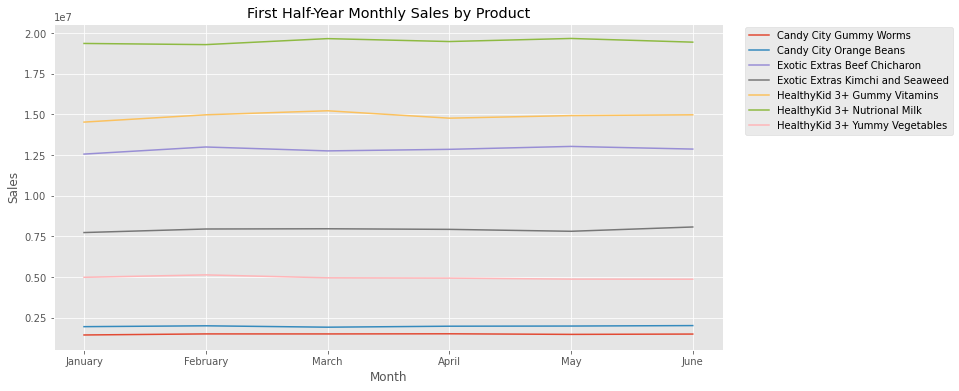

In [12]:
plt.style.use('ggplot')

# Data for onthly sales by product
monthly_sales_product_plot = pd.pivot_table(df_one, index ='Month', columns = 'Product Name', values= 'Sales', aggfunc=np.sum)

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_product_plot)
plt.title('First Half-Year Monthly Sales by Product')
plt.xticks((1,2,3,4,5,6), ('January', 'February', 'March', 'April', 'May', 'June'))
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend(product_list, bbox_to_anchor=(1.35,0.825), loc='right')
plt.savefig("monthly_sales_by_product", dpi=400, bbox_inches="tight")

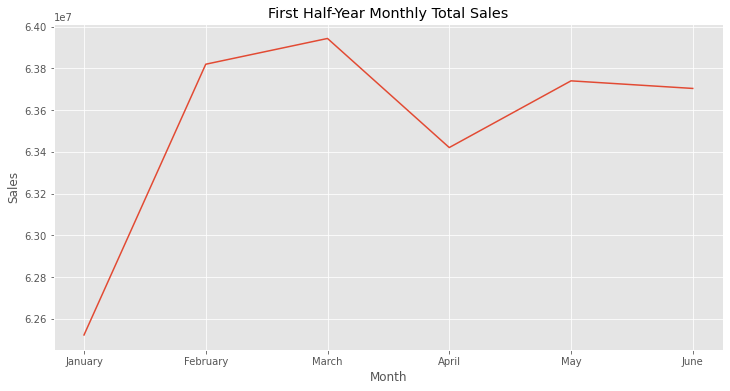

In [13]:
# Data for monthly total sales
monthly_total_sales_plot = df_one.groupby('Month')['Sales'].sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_total_sales_plot)
plt.title('First Half-Year Monthly Total Sales')
plt.xticks((1,2,3,4,5,6), ('January', 'February', 'March', 'April', 'May', 'June'))
plt.xlabel("Month")
plt.ylabel("Sales")
plt.savefig("monthly_total_sales", dpi=400, bbox_inches="tight")

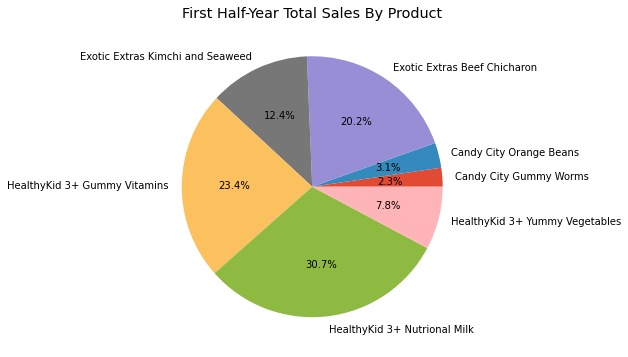

In [14]:
# Data for total sales by product
total_sales_product_plot = df_one.groupby('Product Name')['Sales'].sum()

plt.figure(figsize=(12, 6))
plt.pie(total_sales_product_plot, labels = product_list, autopct='%1.1f%%')
plt.title('First Half-Year Total Sales By Product')
plt.savefig("total_sales_by_product", dpi=400, bbox_inches="tight")

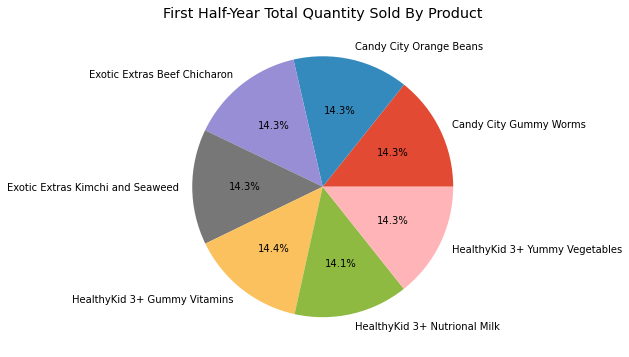

In [15]:
# Data for total quantity sold by product from Jan to June
total_quantity_product_plot = df_one.groupby('Product Name')['Quantity'].sum()

plt.figure(figsize=(12, 6))
plt.pie(total_quantity_product_plot, labels = product_list, autopct='%1.1f%%')
plt.title('First Half-Year Total Quantity Sold By Product')
plt.savefig("total_quantity_by_product", dpi=400, bbox_inches="tight")

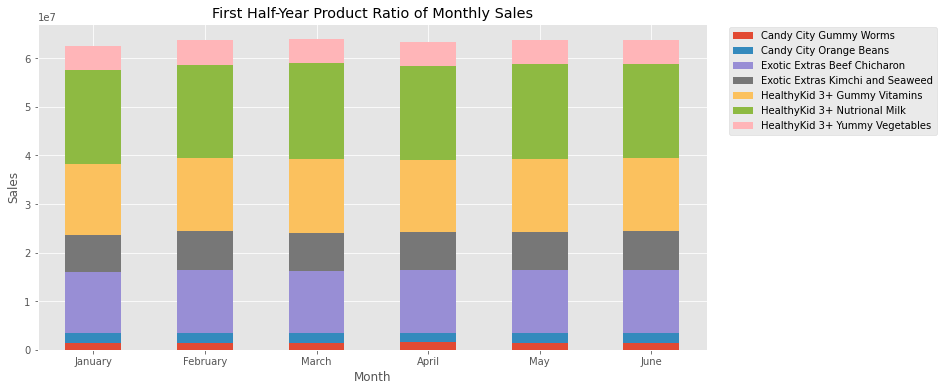

In [16]:
# Data for product ratio in terms of monthly sales
product_ratio_plot = pd.pivot_table(df_one, index ='Month', columns = 'Product Name', values= 'Sales', aggfunc=np.sum).plot.bar(stacked=True, figsize = (12,6))

product_ratio_plot.set_xlabel("Month")
product_ratio_plot.set_ylabel("Sales")
product_ratio_plot.set_xticks((0,1,2,3,4,5), ('January', 'February', 'March', 'April', 'May', 'June'), rotation=0)
product_ratio_plot.legend(product_list, bbox_to_anchor=(1.35,0.825), loc='right')
product_ratio_plot.set_title("First Half-Year Product Ratio of Monthly Sales")
plt.savefig("product_ratio_of_monthly_sales", dpi=400, bbox_inches="tight")

# Part 2: Loyalty Program Status

### New dataframe for data needed in Part 2

In [17]:
df_two = df[['name','transaction_date']].copy() # New df for the data needed

# Convert transaction date to datetime format and get the transaction month
df_two['transaction_date']= pd.to_datetime(df_two['transaction_date'])
df_two['month'] = df_two['transaction_date'].dt.month_name(locale = 'English')
months = df_two['month'].unique() # List for unique transaction month values

# Create month columns containing boolean values - TRUE: customer has transaction that month OR FALSE: no transaction that month
for i in range(len(months)):
    df_two[months[i]] = (df_two['month'] == months[i])

df_two

,name,transaction_date,month,January,February,March,April,May,June
0,Jennifer Campbell,2022-01-12,January,True,False,False,False,False,False
1,Melissa Kim,2022-01-12,January,True,False,False,False,False,False
2,Melissa Kim,2022-01-08,January,True,False,False,False,False,False
3,Melissa Kim,2022-01-10,January,True,False,False,False,False,False
4,Kristen Cooper,2022-01-24,January,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
83031,Tammy Byrd,2022-06-05,June,False,False,False,False,False,True
83032,Donald Andersen,2022-06-12,June,False,False,False,False,False,True
83033,Donald Andersen,2022-06-15,June,False,False,False,False,False,True
83034,Donald Andersen,2022-06-09,June,False,False,False,False,False,True


### Monthly transactions dataframe

In [18]:
# Sums up the number of transactions of each customer monthly
monthly_transactions = df_two.groupby('name')[months].sum()

# Converts the value of each dataframe row into a list. The list  summarizes the number of transactions each customer has over the transaction months.
monthly_transactions["truths_list"] = monthly_transactions.values.tolist()

# Displays the monthly transactions dataframe
monthly_transactions

,January,February,March,April,May,June,truths_list
name,,,,,,,
Aaron Beasley,0,0,0,2,2,1,"[0, 0, 0, 2, 2, 1]"
Aaron Brewer,1,1,1,2,0,2,"[1, 1, 1, 2, 0, 2]"
Aaron Brown,0,0,3,2,1,1,"[0, 0, 3, 2, 1, 1]"
Aaron Coffey,1,2,2,2,2,0,"[1, 2, 2, 2, 2, 0]"
Aaron Davis,1,1,0,3,3,2,"[1, 1, 0, 3, 3, 2]"
...,...,...,...,...,...,...,...
Zachary Valentine,1,1,1,1,2,3,"[1, 1, 1, 1, 2, 3]"
Zachary Ware,1,2,3,1,3,2,"[1, 2, 3, 1, 3, 2]"
Zachary Williams,4,4,4,4,0,0,"[4, 4, 4, 4, 0, 0]"


### Functions for repeaters, inactive, engaged

In [19]:
# Functions that return lists indicating the months when each customer was a repeater, inactive, and/or engaged customer. 
# Values: 1 if a customer was a repeater/inactive/engaged that month; 0 if not and also 0 for the earliest month in the transactional data (repeater & inactive only) 

def check_repeaters(list): # 'list' refers to the truths_list of each customer
    repeater_truths = [] 
    for i in range(len(list)): # Goes over each month
        if i == next((i for i, x in enumerate(list) if x != 0), None): # Check if first transaction month
            repeater_truths.append(0) 
        elif (list[i] > 0) and (list[i-1] > 0): # If there is transaction that month AND previous month
            repeater_truths.append(1)
        else:
            repeater_truths.append(0)
    return repeater_truths

def check_inactive(list): # 'list' refers to the truths_list of each customer
    inactive_truths = [] 
    for i in range(len(list)): # Goes over each month
        if i == next((i for i, x in enumerate(list) if x != 0), None): # Check if first transaction month
            inactive_truths.append(0)
        elif (list[i] == 0) and (any(list[i] > 0 for i in range(0,i))): # If no transaction that month AND there is at least one transaction for one of the previous months
            inactive_truths.append(1)
        else:
            inactive_truths.append(0)
    return inactive_truths

def check_engaged(list): # 'list' refers to the truths_list of each customer
    engaged_truths = [] 
    for i in range(len(list)): # Goes over each month
        if (all(list[i] > 0 for i in range(0, i+1))): # If there is a transaction from the previous months up to current month
            engaged_truths.append(1)
        else:
            engaged_truths.append(0)
    return engaged_truths

### Repeaters

In [20]:
# Lists indicating which months each customer was a repeater
repeaters_truths = monthly_transactions.apply(lambda x: check_repeaters(x['truths_list']), axis = 1).tolist()

# Total number of repeaters each month (index 0 is first month)
repeaters_sum = np.sum(repeaters_truths, 0)
repeaters_sum

array([   0, 5172, 5216, 5154, 5110, 5193])

### Inactive

In [21]:
# Lists indicating which months each customer was inactive
inactive_truths = monthly_transactions.apply(lambda x: check_inactive(x['truths_list']), axis = 1).tolist()

# Total number of inactive customers each month (index 0 is first month)
inactive_sum = np.sum(inactive_truths, 0) 
inactive_sum

array([   0, 1416, 1747, 1909, 1917, 1835])

### Engaged

In [22]:
# Lists indicating which months each customer was engaged
engaged_truths = monthly_transactions.apply(lambda x: check_engaged(x['truths_list']), axis = 1).tolist()

# Lists the total number of engaged customers each month (index 0 is first month)
engaged_sum = np.sum(engaged_truths, 0) 
engaged_sum 

array([6588, 5172, 4126, 3289, 2667, 2190])

### Loyalty Status Summary

In [23]:
# Dataframe summarizing the data
loyalty_summary = pd.DataFrame([repeaters_sum, inactive_sum, engaged_sum], index = ["Repeaters","Inactive","Engaged"], columns = [months])
loyalty_summary

,January,February,March,April,May,June
Repeaters,0,5172,5216,5154,5110,5193
Inactive,0,1416,1747,1909,1917,1835
Engaged,6588,5172,4126,3289,2667,2190


### Graph

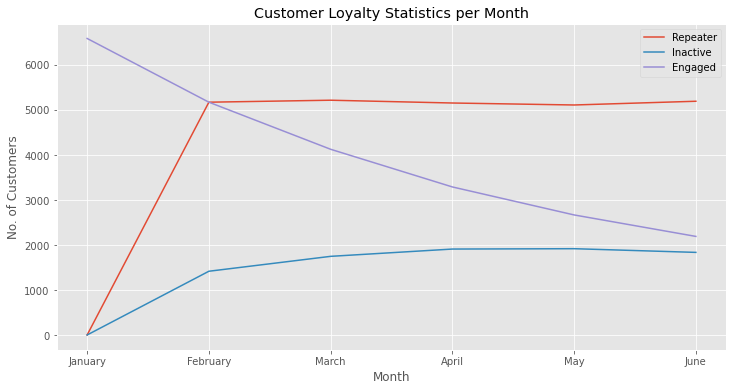

In [24]:
plt.style.use('ggplot')

plt.figure(figsize=(12, 6))
plt.plot(months, repeaters_sum,label = "Repeater")
plt.plot(months, inactive_sum, label = "Inactive")
plt.plot(months, engaged_sum, label = "Engaged")
plt.legend()
plt.xlabel('Month')
plt.ylabel('No. of Customers')
plt.title('Customer Loyalty Statistics per Month')
plt.savefig("customer_loyalty.png", dpi=400, bbox_inches="tight")

# Additional Metrics: Market Demographic Segmentation

In [25]:
df_three = df.copy()

# Group by names (so names in the dataframe are unique) 
df_three = df_three.groupby('name')
df_three = df_three.first()
df_three.head()

,address,birthdate,mail,sex,username,transaction_items,transaction_value,transaction_date
name,,,,,,,,
Aaron Beasley,"1464 Ian Squares Apt. 351\nJasonberg, ND 95840",1999/02/07,lvaldez@yahoo.com,M,hermanjustin,"HealthyKid 3+,Nutrional Milk,(x1);Exotic Extra...",4588,2022/04/24
Aaron Brewer,"31499 Donna Locks\nTaylorfurt, MO 98699",1938/02/25,allisonkatherine@hotmail.com,M,kathryn58,"HealthyKid 3+,Gummy Vitamins,(x3);HealthyKid 3...",6490,2022/01/08
Aaron Brown,"532 Sexton Overpass\nFloresview, TN 53240",2013/12/21,charlesthompson@yahoo.com,M,coxjohnathan,"Candy City,Orange Beans,(x4);Exotic Extras,Bee...",5992,2022/03/27
Aaron Coffey,"9332 Edward Court\nRamirezland, NC 80112",2006/09/18,cstevens@yahoo.com,M,monique70,"HealthyKid 3+,Yummy Vegetables,(x1)",500,2022/01/19
Aaron Davis,"2729 Jessica Landing\nSanchezburgh, PA 22575",2010/01/25,wjames@hotmail.com,M,tcox,"Candy City,Gummy Worms,(x2);HealthyKid 3+,Nutr...",8260,2022/01/18


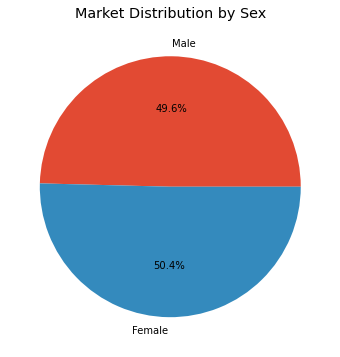

In [26]:
male = df_three.loc[df_three['sex'] == 'M', 'sex'].count()
female = df_three.loc[df_three['sex'] == 'F', 'sex'].count()

plt.style.use('ggplot')

plt.figure(figsize=(12, 6))
plt.pie([male, female], labels = ['Male', 'Female'], autopct='%1.1f%%')
plt.title('Market Distribution by Sex')
plt.savefig('sex_distribution', dpi=400, bbox_inches="tight")

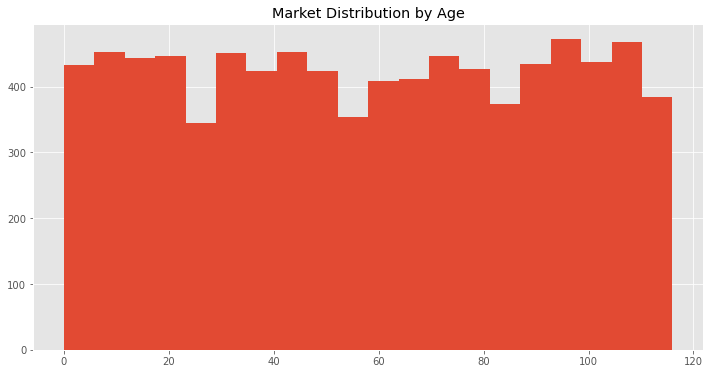

In [27]:
def convert_to_age(birthdate):
    birthdate = pd.to_datetime(birthdate)
    today = datetime.date.today()
    age = today.year - birthdate.year
    if (today.month, today.day) < (birthdate.month, birthdate.day): age -= 1 
    return age 

df_three['age'] = df_three['birthdate'].apply(convert_to_age)

plt.figure(figsize = (12, 6))
plt.hist(df_three['age'], bins = 20)
plt.title('Market Distribution by Age')
plt.savefig('age_distribution', dpi=400, bbox_inches="tight")